## Jesús Daniel Martínez García A00833591

In [ ]:
# Import drive to connect and interact with Google Drive (so we can import the data)
# Note: This may take a while, but remember to give permission
from google.colab import drive

drive.mount("/content/gdrive")
!pwd # Print working directory

Mounted at /content/gdrive
/content


In [ ]:
# Navigate to the path where the dataset is stored and read the csv file
%cd "/content/gdrive/MyDrive/IA/NOTEBOOKS"
!ls # List files located in defined folder

/content/gdrive/MyDrive/IA/NOTEBOOKS
 bankloan.csv				  score_updated.csv
 Cancer_Data.csv			 'sesion5_actividad5_over_under_fitting_V02 (1).ipynb'
 hypothesis_function_alumno.ipynb	  TC3006C.M3.01.ETL.pdf
 implementacionRegresionLogistica.ipynb   TC3006C.M3.02.Tutorial.Numpy.ipynb
 iris.data				  TC3006C_M3_03_Tutorial_Pandas.ipynb
'linear_reg_gd1_alumno (1).ipynb'	  TC3006C.M3.04.Tutorial.Scipy.ipynb
'log_reg_gd_V06_alumno (1).ipynb'	  TC3006C_M3_05_Tutorial_Scikit_learn.ipynb
'log_reg_multiclase_alumnos (2).ipynb'	  TC3006C_M3_07_Tutorial_Seaborn.ipynb
 NN.ipynb				  wine.data
'perceptron_and_or_xnor (1) (1).ipynb'	  wine.names


In [ ]:
import pandas as pd

# dataset de kaggle https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:

#Convertimos  variable categorica para que el modelo pueda manejarla.
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

df_x = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave points_mean']]


## Nuestra variable a predecir con la regresión logística será el diagnóstico (0 = Benigno, 1 = Maligno)
df_y = df['diagnosis']

In [ ]:
## Aquí utilizaremos la función de train_test_split como la utilizada en la actividad de regresión logistica multiclase para separar nuestro datasets en datos de entrenamiento y prueba
##la función divide los datos en 80% entrenamiento y 20% prueba.

from sklearn.model_selection import train_test_split

#Esto nos servirá para ver si el modelo generaliza bien con otros datos

X_train, X_temp, y_train, y_temp = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
## Escalar las features nos permitira que el modelo trate a todas las features con igual de importancia

from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)


#transform utilizda en los datos de prueba
X_test_scaled = sc.transform(X_test)

X_val_scaled = sc.transform(X_val)


In [ ]:
##inicializacion de theta y columna de 1sss

import numpy as np

# Inicialización del vector theta con valores random (incluyendo el término dell bias)


theta = np.random.randn(len(X_train_scaled[0]) + 1, 1)

# Añadir la columna de unos a X_train_scaled para incluir el bias en X_vect
X_vect = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_vect = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]


print(X_vect[:5])
print(X_vect.shape)

[[ 1.         -0.12348985 -0.29680142 -0.17050713 -0.20861569 -1.2016799
  -0.7731696  -0.76231194 -0.93324109]
 [ 1.         -0.22826757 -0.65795149 -0.25377521 -0.2965028  -1.80463697
  -0.58761605 -0.09198533 -0.54268359]
 [ 1.          0.14553402 -1.23056444  0.24583328 -0.01024193  0.5191843
   1.57000613  0.73231958  0.38658307]
 [ 1.         -0.35853176 -0.67220742 -0.40093712 -0.40001429 -1.20386189
  -0.9706502  -0.63470419 -0.6549921 ]
 [ 1.         -0.15747182  0.96722386 -0.20884342 -0.24153848 -0.25469546
  -0.7006297  -0.75034872 -0.63746879]]
(398, 9)


In [ ]:
##DEFINIMOS LAS FUNCIONES NECESARIAS PARA IMEPLEMENTAR LA REGRESIÓN LOGÍSTICA

import matplotlib.pyplot as plt


##funcion sigmoide convierte en un num entre 0 y 1
def sigmoid_function(X):
    return 1 / (1 + np.exp(-X))

##Regresión logística, utiliza gradient descent para ajustar las thetas, x son los features, y la label,
#alpha el learning reate y los epochs la cantidad de veces que se actulizarán los parametros
def log_regression(X, y, theta, alpha, epochs):
  y_ = np.reshape(y, (len(y), 1)) # shape (150,1)
  N = len(X)
  avg_loss_list = []
  for epoch in range(epochs):
    sigmoid_x_theta = sigmoid_function(X_vect.dot(theta)) # shape: (150,5).(5,1) = (150,1)
    grad = (1/N) * X_vect.T.dot(sigmoid_x_theta - y_) # shapes: (5,150).(150,1) = (5, 1)
    theta = theta - (alpha * grad)
    hyp = sigmoid_function(X_vect.dot(theta)) # shape (150,5).(5,1) = (150,1)
    avg_loss = -np.sum(np.dot(y_.T, np.log(hyp) + np.dot((1-y_).T, np.log(1-hyp)))) / len(hyp)
    if epoch % 1000 == 0:
      print('epoch: {} | avg_loss: {}'.format(epoch, avg_loss))

    avg_loss_list.append(avg_loss)
  plt.plot(np.arange(1, epochs), avg_loss_list[1:], color='red')
  plt.title('Cost function')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.show()
  return theta


In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, cv, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    # Calcular las medias y desviaciones estándar de los scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Graficar la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Precisión en entrenamiento")
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label="Precisión en validación")

    # Rellenar la región de desviación estándar
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

    # Etiquetas y título
    plt.title("Curva de Aprendizaje para el Modelo de Regresión Logística")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()



epoch: 0 | avg_loss: 146.35436785842472
epoch: 1000 | avg_loss: 9.34802230681203
epoch: 2000 | avg_loss: 9.596549989706766
epoch: 3000 | avg_loss: 9.744874254389751
epoch: 4000 | avg_loss: 9.775990524308405
epoch: 5000 | avg_loss: 9.747766685846809
epoch: 6000 | avg_loss: 9.695908814455072
epoch: 7000 | avg_loss: 9.63807917513526
epoch: 8000 | avg_loss: 9.582138842792691
epoch: 9000 | avg_loss: 9.531153377612664


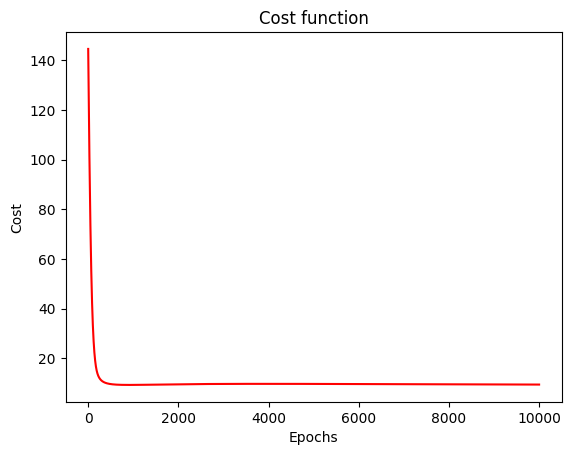

In [ ]:
#alpha = 0.01
#epochs = 10000

#theta_final = log_regression(X_vect, y_train, theta, alpha, epochs)


Precisión del modelo: 91.86%
Matriz de Confusión:
[[59  1]
 [ 6 20]]
Precision: 95.24%
Recall: 76.92%
F1-Score: 85.11%
      Metric  Score (%)
0  Precision  95.238095
1     Recall  76.923077
2   F1-Score  85.106383


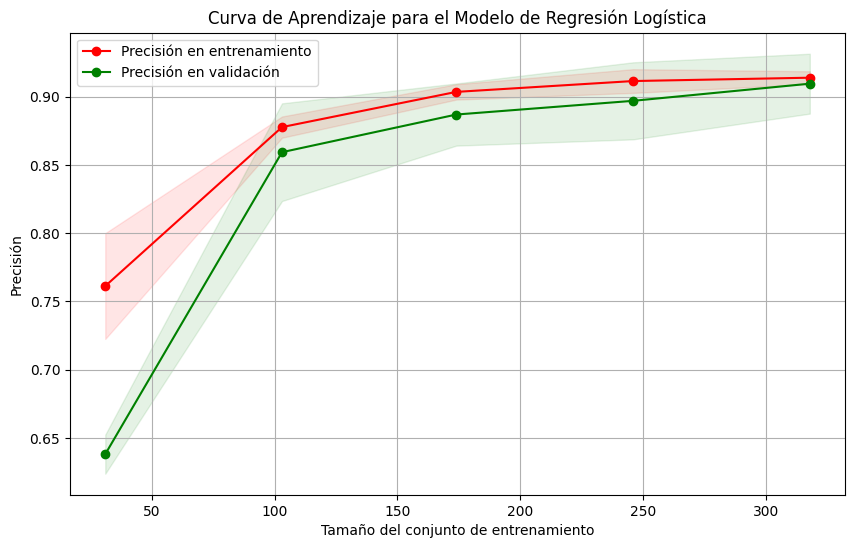

In [ ]:
#sin utilizar los hiperparametros optimizados
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# Define los hiperparámetros sin optimizar
C_value = 0.01
max_iter_value = 500
solver_value = 'lbfgs'
penalty_value = 'l2'

log_reg = LogisticRegression(C=C_value, max_iter=max_iter_value, solver=solver_value, penalty=penalty_value)

# Entrena el modelo
log_reg.fit(X_train_scaled, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_test = log_reg.predict(X_test_scaled)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión:")
print(conf_matrix)

# Otras métricas
precision = precision_score(y_test, y_pred_test) * 100
recall = recall_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100

print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-Score: {f1:.2f}%')

metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score (%)': [precision, recall, f1]
})

print(metrics_table)

# Cross-validation con StratifiedKFold
cv = StratifiedKFold(n_splits=5)

# Graficar la curva de aprendizaje con el modelo actual
plot_learning_curve(log_reg, X_train_scaled, y_train, cv=cv)


In [ ]:

##2DO ENTREGABLE USO DE FRAMEWORK PARA ENTRENAR EL MODELO utilizando grid search para optimizar los hiperparametros


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000, 5000],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
}

# Inicializamos el modelo de regresión logística
log_reg = LogisticRegression()

# Configuramos el Grid Search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenamos el modelo con el Grid Search
grid_search.fit(X_train_scaled, y_train)

# Imprimimos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Utilizamos el mejor modelo para hacer predicciones
best_log_reg = grid_search.best_estimator_

# Hacemos predicciones con los datos de prueba
y_pred_test = best_log_reg.predict(X_test_scaled)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Precisión del modelo con Grid Search: {accuracy * 100:.2f}%')

# Generamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión:")
print(conf_matrix)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión del modelo con Grid Search: 96.51%
Matriz de Confusión:
[[58  2]
 [ 1 25]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculamos las otras métricas de rendimiento
precision = precision_score(y_test, y_pred_test) * 100
recall = recall_score(y_test, y_pred_test) * 100
f1 = f1_score(y_test, y_pred_test) * 100
accuracy = accuracy_score(y_test, y_pred_test) * 100

# Imprimimos las métricas
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1-Score: {f1:.2f}%')


# Generamos la tabla de métricas
import pandas as pd

metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score (%)': [precision, recall, f1]
})

# Mostramos la tabla
print(metrics_table)

Precision: 92.59%
Recall: 96.15%
F1-Score: 94.34%
      Metric  Score (%)
0  Precision  92.592593
1     Recall  96.153846
2   F1-Score  94.339623


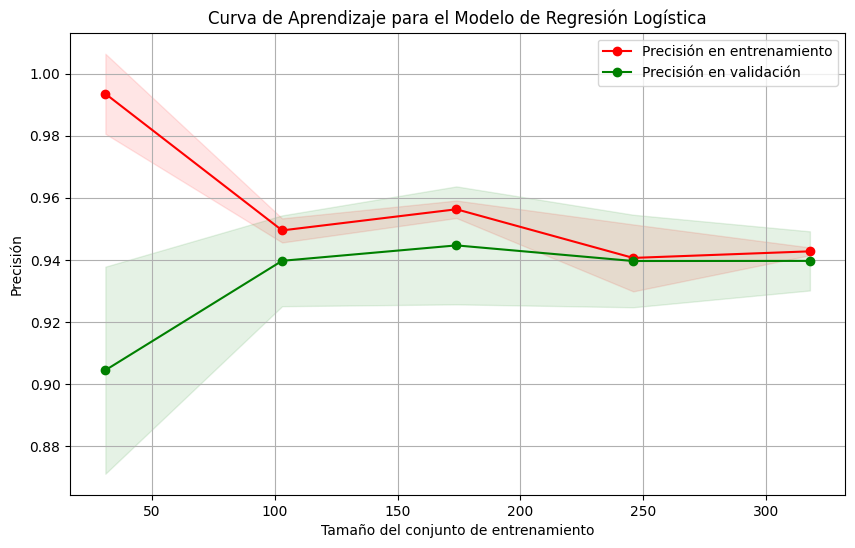

In [ ]:
# PARA MODELO ENTRENADO CON REGRESION LOGISTICA DE SK LEARN
from sklearn.model_selection import StratifiedKFold
# Cross-validation con 5 pliegues
cv = StratifiedKFold(n_splits=5)

# Llamar a la función de la curva de aprendizaje
plot_learning_curve(log_reg, X_train_scaled, y_train, cv=cv)


In [ ]:
from sklearn.model_selection import cross_val_score

# Hacemos cross-validation con el mejor modelo encontrado
cv_scores = cross_val_score(best_log_reg, X_train_scaled, y_train, cv=5)

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Promedio de Cross-Validation Score: {cv_scores.mean()}')

# Evaluamos el modelo con el conjunto de validación
y_val_pred = best_log_reg.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Precisión del modelo con el conjunto de validación: {val_accuracy * 100:.2f}%')

# Evaluación final en el conjunto de prueba
y_test_pred = best_log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Precisión del modelo con el conjunto de prueba: {test_accuracy * 100:.2f}%')


Cross-Validation Scores: [0.9375     0.9375     0.95       0.92405063 0.94936709]
Promedio de Cross-Validation Score: 0.9396835443037975
Precisión del modelo con el conjunto de validación: 92.94%
Precisión del modelo con el conjunto de prueba: 96.51%


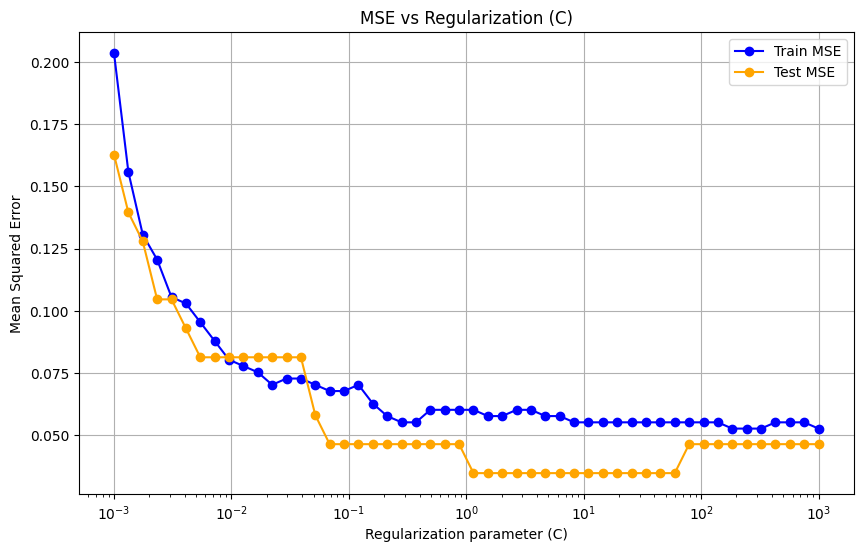

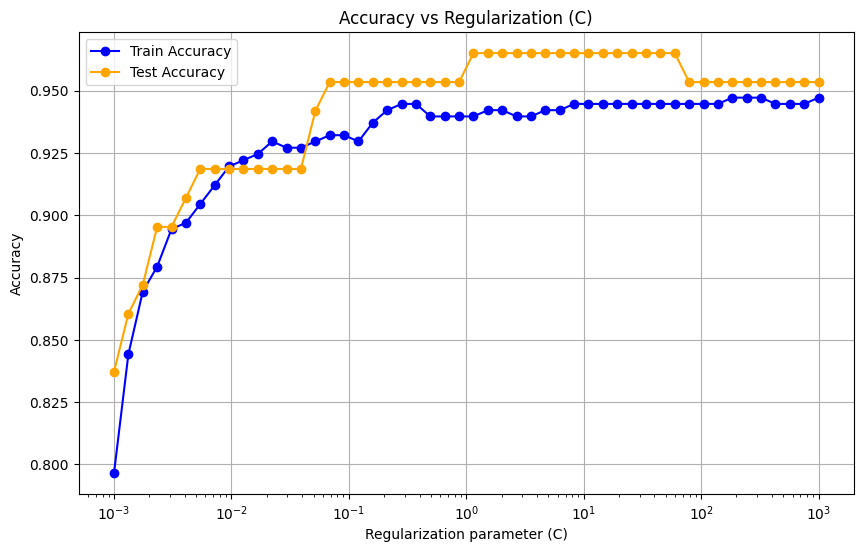

In [ ]:
# Valores de C (controlan la regularización) para probar
C_values = np.logspace(-3, 3, 50)  # Desde 0.001 hasta 1000

train_mse = []
test_mse = []
train_accuracy = []
test_accuracy = []

# Iteramos sobre diferentes valores de C
for C in C_values:
    # Entrenamos el modelo de regresión logística
    log_reg = LogisticRegression(C=C, max_iter=10000)
    log_reg.fit(X_train_scaled, y_train)

    # Predicciones para el conjunto de entrenamiento y prueba
    y_train_pred = log_reg.predict(X_train_scaled)
    y_test_pred = log_reg.predict(X_test_scaled)

    # Calculamos MSE para entrenamiento y prueba
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    # Calculamos la precisión (accuracy)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Graficamos MSE para los conjuntos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_mse, label='Train MSE', color='blue', marker='o')
plt.plot(C_values, test_mse, label='Test MSE', color='orange', marker='o')
plt.xscale('log')  # Escala logarítmica en el eje x (para ver mejor los valores de C)
plt.xlabel('Regularization parameter (C)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Regularization (C)')
plt.legend()
plt.grid(True)
plt.show()

# Graficamos la precisión (accuracy) para los conjuntos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy, label='Train Accuracy', color='blue', marker='o')
plt.plot(C_values, test_accuracy, label='Test Accuracy', color='orange', marker='o')
plt.xscale('log')  # Escala logarítmica en el eje x (para ver mejor los valores de C)
plt.xlabel('Regularization parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization (C)')
plt.legend()
plt.grid(True)
plt.show()


##Reporte para primera entrega.

Para el dataset de cáncer data buscamos predecir el label de diagnosis donde m representaba cáncer maligno y b cáncer benigno. Se implementa el modelo de regresión logística al ser un algoritmo efectivo para el problema que representa, viendo que es una clasificación binaria.

Primero se cargan los datos utilizando pandas, se separan las features y labels así como transformar la label categórica a numérica con 0 para benigno y 1 para maligno, lo que facilitaría el uso en el modelo.

Después dividimos los datos de entrenamiento: 80% training y 20% prueba. Esto lo hacemos para evaluar el modelo con datos que no ha visto antes y validar si generaliza o no.

 Se aplicó un standar scaler, que básicamente asegura que todas las features tengan el mismo peso en el entrenamiento y para el de prueba se escalan usando lo mismo que se calculó en los de entrenamiento, uno con fit_transform y el otro solo con transform.

 En las funciones relevantes para la regresión logística se definió la sigmoide y la función para entrenar el modelo utilizando el gradient descent que ajusta las thetas, alpha sería el learning rate, que contra que tran rapido se ajustan las thetas en cada iteración, después los epochs que es la cantidad de veces que se van a actualizar los parametros del modelo.

 Se crea una función predict que utiliza la funcion sigmoide que calcule las probabilidades de que un diagnotico sea maligno (1), si es mayor o igual a 0.5, si es menor, predice benigno (0).

 Se hacen las predicciones sobre los datos de test y se comparan. El accuracy ahí nos da cuántas veces el modelo predijo correctamente, en este caso obtuvo un 96.4%. También, se implementó una matriz de confusión que muestra cómo se comportó el modelo con más detalle: verdaderos negativos (70), es decir, que el modelo predijo bien que 70 personas no tenían cáncer maligno. Falsos positivos (1) el modelo solo predijo mal que una persona tenía cáncer maligno, cuando no. Verdaderos positivos (40), el modelo predijo correctamente que esa cantidad tenía cáncer maligno. Falsos negativos (3), el modelo dio mal que 3 personas no tenían cáncer maligno, cuando sí.

En cuanto a los hiperparámetros, se decidió utilizar la función de grid search, específicamente para ajustar el learning rate y los epochs, durante estas pruebas aunque la función si identificaba una combinación como la mejor (alpha = 0.001 y epochs = 5000) en cuanto a precisión, el rendimiento del modelo cuando use estos parámetros no fue mejor que utilizando otros hiperparámetros que la función no sugería, probablemente debido a un error en la implementación. Decidí utilizar alpha = 0.01 y epochs = 10000 o 5000, viendo ninguna diferencia variando estos epochs y así el modelo se mostraba mejor. Considero que es un área de oportunidad y un aprendizaje importante obtenido al realizar la práctica, pues concluí que la selección de hiperparámetros es un proceso de experiencia, prueba y error.

En conclusión, se pudo aplicar la regresión logística aprendida en clase y empleada en diversas actividades en un dataset nuevo, en este caso para predecir si un cáncer es benigno o maligno, se utilizaron procesos de escalamiento de features y una correcta división de los datos para asegurar un entrenamiento correcto. Se evaluó el modelo y con la matriz de confusión se mostró que predice bien en la mayoría de casos.

---




